# Testes de normalidade

Quando estudamos os procedimentos para realização de testes de hipóteses conhecidos como teste t e teste z, vimos que sua aplicabilidade é dependente de algumas condições. Em particular, dentre outras presuposições, esses testes requerem que ao menos uma das condições a seguir seja verdadeira:

1. as amostras devem ser normalmente distribuídas

2. as amostras devem ser grandes ($n>30$)

Os chamados *testes de normalidade* são utilizados para verificar se a distribuição de probabilidade associada a um conjunto de dados pode ser aproximada pela distribuição normal.

Existem diferentes abordagens, de uso não exlucisvo entre si, para realizar o teste de normalidade. Essas abordagens podem ser divididas em duas famílias, os *testes visuais* e os *testes estatísticos*. Nesse notebook, vamos estudar as seguintes abordagens para cada uma dessas famílias:

- Testes visuais
 - Q-Q plot (quantile-quantile plot)
 - Histograma
 - Box Plot

- Testes estatísticos
 - Teste de D'Agostino
 - Teste de Shapiro-Wilk

## QQ-plot

Considere uma variável aleatória $X\sim N(\mu_X,\sigma^2_X)$. Sabemos que a variável$Z$ resultante da padronização a seguir também segue uma distribuição normal, desta vez com média $\mu_Z=0$ e variância $\sigma_Z^2=1$:

$$
Z=\frac{X-\mu_X}{\sigma_X}
$$

Considere que $F(\cdot)$ e $\Phi(\cdot)$ são as funções de distribuição acumuladas de $X$ e de $Z$, respectivamente. Sendo assim,

$$
F(x)=\Pr[X \leq x ]=\Pr\left[Z\leq \frac{x-\mu_X}{\sigma_X}\right]=\Phi\left(\frac{x-\mu_X}{\sigma_X}\right).
$$

Ao aplicarmos a função inversa $\Phi^{-1}$ a ambos os lados da equação acima, obtemos:

$$
\Phi^{-1}(F(x))=\frac{x-\mu_X}{\sigma_X}
$$

Por meio de uma manipulação algébrica simples na expressão acima, obtemos:

$$
x=\sigma_X\Phi^{-1}(F(x))+\mu_X
$$

Repare que a expressão acima estabelece uma relação linear entre $x$ e $\Phi^{-1}(F(x))$.

Agora, considere uma amostra $x_1, x_2, \ldots, x_n$ para a qual desejamos verificar se é proveniente de uma distribuição normal. Se isso for verdade, devemos esperar uma tendência aproximadamente linear quando produzirmos um gráfico dos pontos a seguir:

$\Phi^{-1}(F(x))$ | $x$
--- | ---
$\Phi^{-1}(F(x_1))$ | $x_1$
$\Phi^{-1}(F(x_2))$ | $x_2$
$\Phi^{-1}(F(x_3))$ | $x_3$
$\cdots$   | $\cdots$
$\Phi^{-1}(F(x_n))$ | $x_n$

Podemos agora descreve uma sequência de passos para gerar um gráfico a ser usado no teste de normalidade. Esses passos são apresentados a seguir.

1. Considere uma amostra $x_1,\ldots,x_n$;

2. Ordene os elementos da amostra, ou seja, $x(1) \leq x(2) \leq \ldots \leq x(n)$;

3. Calcule $n$ valores $d_i=\frac{i−a}{n+1−2⋅a}$, com $i=1,2,\ldots,n$.

4. Calcule os quantis da distribuição Normal padrão para cada um dos valores $d_i$ ($i=1,\ldots,n$):
$$  
\Phi^{−1}(d_i)
$$

5. Desenhe o gráfico
 - 5.1 (Caso Papel de Probabilidade) Faça um gráfico com os pontos (x(i),Φ−1(di)), $i=1,\ldots,n$; ou
    
 - 5.2. (Caso QQ-plot) Faça um gráfico com os pontos (Φ−1(di),x(i)), i=1,…,n; e

No passo 3 do procedimento acima, $a=3/8$, se $n \leq 10$, e $a=1/2$ em caso contrário. A correção é necessária para que não tenhamos $d_i=1$, pois neste caso, teríamos que $\Phi^{−1}(1)=\infty$. Estas constantes não são padrão, dependendo do autor (ou software de estatísticas) elas podem mudar.

Após a construção do gráfico, a normalidade dos dados é verificada visualmente. Quanto "mais linear" for o gráfico, mais próxima da distribuição normal é a amostra.


A célula de código a seguir ilustra de que forma o procedimento descrito acima pode ser implementado. Considere que queiramos verificar se a amostra abaixo é proveniente de uma distribuição normal:

``
484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64,
485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03,
475.32, 529.41, 518.13, 464.32, 449.08, 489.27
``

Para isso, incialmente implementamos a função `phi_inversa`, que corresponde à aplicação da função $\Phi^{-1}$ aos valores $d_i$ computados a partir da amostra (previamente ordenada).

In [ ]:
import numpy as np
from scipy.stats import norm

def phi_inversa(amostra, a):
  n = amostra.shape[0]
  i = np.arange(start=1, stop=n+1)
  d_i = (i-a)/(n+1-2*a)
  return norm.ppf(d_i)

A célula a seguir usa a função phi_inversa para produzir os pontos a serem exibidos no gráfico de probabilidades. Note que samos $a=0.5$ posto que a amostra possui mais do que 10 elementos.

[449.08 459.49 464.32 465.68 471.38 473.88 475.32 484.11 485.03 489.27
 493.64 494.48 495.03 501.59 502.85 512.01 518.13 528.63 529.41 538.08]


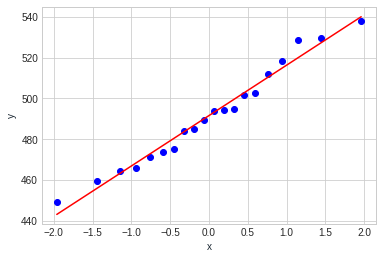

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

plt.style.use('seaborn-whitegrid')

amostra = np.array([484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64,
                    485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03,
                    475.32, 529.41, 518.13, 464.32, 449.08, 489.27])

amostra = np.sort(amostra)
print(amostra)

a = 0.5
x = phi_inversa(amostra, a)
y = amostra

plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.plot(x, y, 'o', color='blue')

# ajusta uma reta sobre os pontos da amostra para facilitar a inspeção visual.
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y = slope * x + intercept
plt.plot(x, y, '-r', label='y=2x+1')

O código acima apresenta a implementação do gráfico de probabilidades. Entretanto, em situações práticas, você pode usar a função ``scipy.stats.statsprob``, conforme exemplo na célula de código a seguir.

((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([449.08, 459.49, 464.32, 465.68, 471.38, 473.88, 475.32, 484.11,
         485.03, 489.27, 493.64, 494.48, 495.03, 501.59, 502.85, 512.01,
         518.13, 528.63, 529.41, 538.08])),
 (25.893592178083388, 491.5704999999999, 0.9913153109759704))

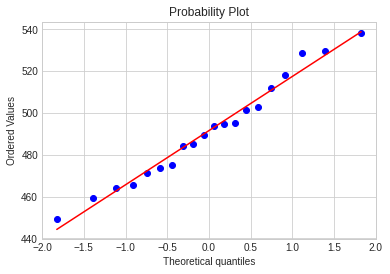

In [ ]:
import scipy
import matplotlib
scipy.stats.probplot(amostra, dist="norm", plot=matplotlib.pyplot)

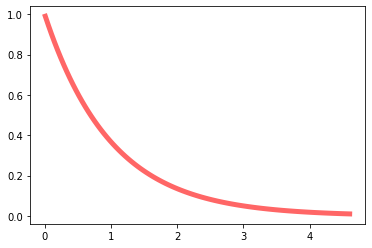

In [ ]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([0.04263723, 0.20425082, 0.24788955, 0.42999153, 0.47901979,
         0.53027765, 0.55962413, 0.61418307, 0.62721525, 0.81618066,
         0.9574141 , 0.97934285, 0.99972836, 1.2094084 , 1.30725788,
         1.35068991, 1.49753838, 1.5772179 , 2.82960418, 4.61911815])),
 (0.9366864970311555, 1.0939294895025653, 0.8546883657374608))

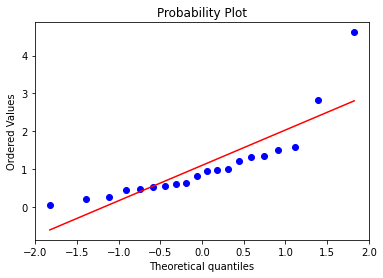

In [ ]:
import scipy
import matplotlib

r = expon.rvs(size=20)
scipy.stats.probplot(r, dist="norm", plot=matplotlib.pyplot)

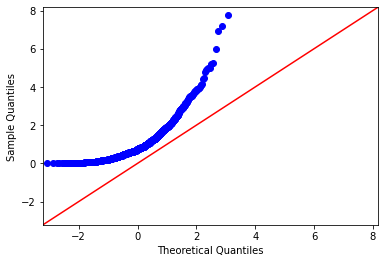

In [ ]:
import statsmodels.api as sm
import pylab

#test = np.random.normal(0,1, 200)
test = expon.rvs(size=1000)

sm.qqplot(test, line='45')
pylab.show()

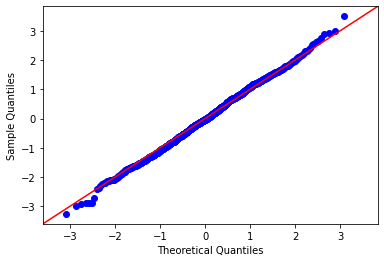

In [ ]:
import statsmodels.api as sm
import pylab

test = np.random.normal(0,1, 1000)

sm.qqplot(test, line='45')
pylab.show()

## Histograma

Outra abordagem visual para testar a normalidade de uma amostra é gerar seu histograma e investigar se o gráfico de densidade correspondente se aproxima de uma curva normal.

A biblioteca [Seaborn](https://seaborn.pydata.org) fornece a função [displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) que dá suporte ao uso dessa abordagem de inspeção visual, conforme o exemplo abaixo.

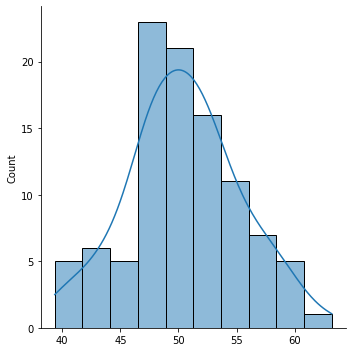

In [ ]:
import seaborn as sns
from numpy.random import randn

# gera uma amostra de tamanho 100 que segue a distribuição normal
amostra_sintetica = 5 * randn(100) + 50

ax = sns.displot(amostra_sintetica, kde=True)

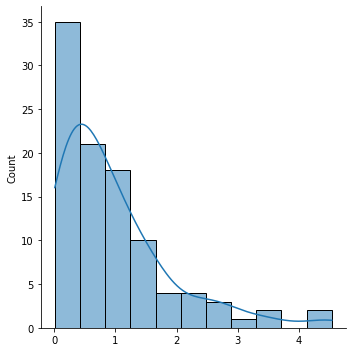

In [ ]:
import seaborn as sns
from numpy.random import exponential

# gera uma amostra de tamanho 100 que segue a distribuição exponencial
amostra_sintetica = exponential(size=100)

ax = sns.displot(amostra_sintetica, kde=True)

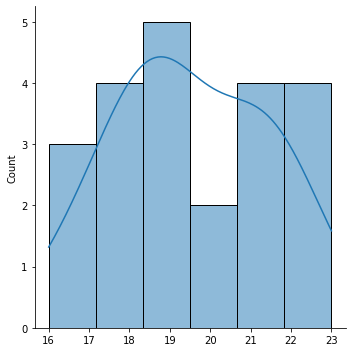

In [ ]:
import numpy as np
amostra   = np.array([18,19,22,22,19,16,21,21,21,20,17,18,18,17,19,19,18,21,23,19,22,20])
ax = sns.displot(amostra, kde=True)

## Box Plot

Outra abordagem visual para verificar a normalidade de uma amostra é contruir um *box plot*. Se a amostra for proveniente de uma distribuição normal, não devemos esperar encontrar uma quantidade grande de valores extremos quanto visualizarmos o *box plot* dessa amostra. Além disso, a média e a mediana devem estar localizadas na parte central do gráfico se a amostra for realmente proveniente de uma distribuição normal.

Veja os dois exemplos a seguir, mais uma vez usando amostras sintéticas que seguem a distribuição normal e exponencial, respectivamente.

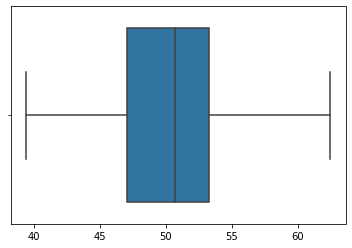

In [ ]:
import seaborn as sns
import numpy as np

# gera uma amostra de tamanho 100 que segue a distribuição normal
amostra_sintetica = 5 * np.random.randn(100) + 50

ax = sns.boxplot(x=amostra_sintetica)

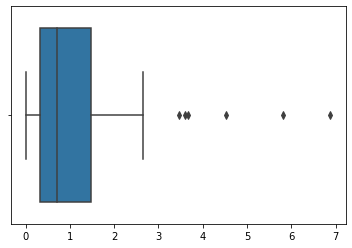

In [ ]:
import seaborn as sns
import numpy as np

# gera uma amostra de tamanho 100 que segue a distribuição exponencial
amostra_sintetica = np.random.exponential(size=100)

ax = sns.boxplot(x=amostra_sintetica)

# Testes Estatísticos

Os testes estatísticos para normalidade descritos aqui presumem como hipótese nula que a amostra é proveniente de uma distribuição normal. Sendo assim, para verificar a normalidade de uma amostra usando esses testes, devemos comparar o valor de $p$ com o nível de significância (normalmente o valor $\alpha=0.05$ é utilizado). Se o valor de $p$ for menor do que $\alpha$, então há evidência suficiente para rejeitar a hipótese nula e declarar que a amostra não é proveniente de uma distribuição normal.

## Teste  de D’Agostino

O teste de D’Agostino combina dois sumários estatísticos (que são computados a partir dos dados da amostra) para determinar se a distribuição correspondente se afasta da distribuição normal. Esses sumários são os seguintes:

- assimetria (*skew*) é uma medida da intensidade pela qual uma distribuição é "empurrada" para a esquerda ou direita.

- curtose (*kurtosis*) é uma medida do quanto da distribuição está na(s) cauda(s).

No scipy, a função [normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) implementa o teste de D’Agostino. Dada uma amostra $x$, a função normaltest retorna um par de valores numéricos. O primeiro é o valor da estatística de teste usada. O segundo é o valor $p$ associado. Dada a hipótese nula de que $x$ veio de uma distribuição normal, o valor $p$ representa a probabilidade de que um valor da estatística tão grande ou maior seja produzido por obra do acaso. Se $p$ for muito pequeno, significa que é improvável que os dados sejam originários de uma distribuição normal.

O exemplo a seguir ilustra o uso dessa função.

In [ ]:
import numpy as np
from scipy.stats import normaltest

def apply_normaltest(x):
  k2, p = normaltest(x)
  alpha = .05
  print("p = {:g}".format(p))

  if p < alpha:  # H_0: x é proveniente de uma distribuição normal
    print("A hipótese nula pode ser rejeitada")
  else:
    print("A hipótese nula pode NÃO ser rejeitada")

amostra   = np.array([18,19,22,22,19,16,21,21,21,20,17,18,18,17,19,19,18,21,23,19,22,20])

apply_normaltest(amostra)

p = 0.577089
A hipótese nula pode NÃO ser rejeitada


Repare que, ao invocarmos a função `apply_normatest` sobre uma amostra que sabemos não ser proveniente de uma distribuição normal, o valor $p$ produzido é pequeno, conforme esperado. Veja o exemplo a seguir.

In [ ]:
# gerar uma amostra de tamamnho 100 que segue a distribuição uniforme
amostra = stats.uniform.rvs(size = 100)
apply_normaltest(amostra)

p = 2.15485e-05
A hipótese nula pode ser rejeitada


## Teste de Shapiro-Wilk

Outro teste estatístico de normalidade é o denominado *teste de [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro–Wilk_test)*. O scipy também fornece uma implementação desse teste.

In [ ]:
import numpy as np
from scipy.stats import shapiro

def apply_normaltest(x):
  k2, p = stats.shapiro(x)
  alpha = .05
  print("p = {:g}".format(p))

  if p < alpha:  # H_0: x é proveniente de uma distribuição normal
    print("A hipótese nula pode ser rejeitada")
  else:
    print("A hipótese nula pode NÃO ser rejeitada")

amostra   = np.array([18,19,22,22,19,16,21,21,21,20,17,18,18,17,19,19,18,21])

apply_normaltest(amostra)

p = 0.267871
A hipótese nula pode NÃO ser rejeitada


Da saída do exemplo acima, o valor de $p \approx 0.2679$ é maior do que o nível de significância $\alpha=0.05$. Isso implica em concluirmos que amostra é proveniente de uma distribuição populacional que não é significativamente diferente da distribuição normal. Em outras palavras, poderíamos presumir a normalidade da amostra neste caso.

# Considerações Finais

Há diversos outros teste de normalidade propostos. Aqui descrevemos apenas uma pequena fração deles. Como dica prática, procure aplicar mais de um teste de normalidade sobre as amostras disponíveis, com o propósito de acumular evidências sobre a normalidade dos dados.

O artigo [Avaliação da normalidade dos dados em estudos clínicos e
experimentais](https://www.scielo.br/pdf/jvb/v16n2/1677-5449-jvb-16-2-88.pdffornece) apresenta mais informações acerca des testes de normalidade e serve como complemento a este notebook.